<a href="https://colab.research.google.com/github/Minasardari/Berkeley_Module5_Coupons/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
os.makedirs("images", exist_ok=True)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [8]:
data = pd.read_csv('data/coupons.csv')

In [9]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [10]:
data.shape

(12684, 26)

2. Investigate the dataset for missing or problematic data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

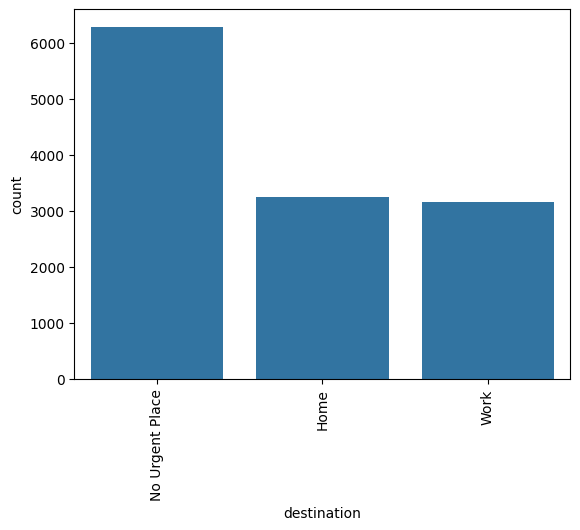


Unique values in 'passanger':
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
passanger
Kid(s)       1006
Partner      1075
Friend(s)    3298
Alone        7305
Name: count, dtype: int64
passanger
Kid(s)       0.08
Partner      0.08
Friend(s)    0.26
Alone        0.58
Name: proportion, dtype: float64


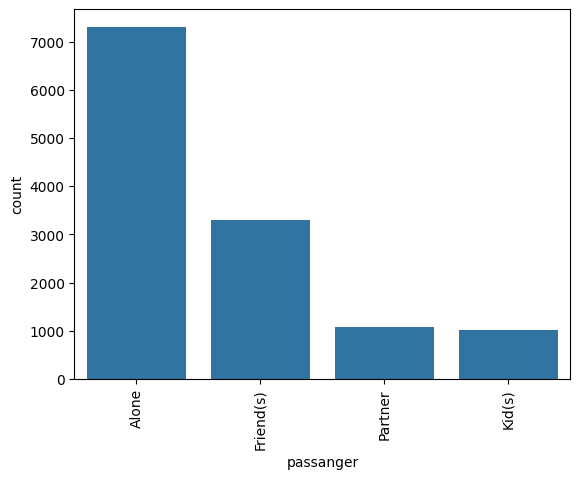


Unique values in 'weather':
['Sunny' 'Rainy' 'Snowy']
weather
Rainy     1210
Snowy     1405
Sunny    10069
Name: count, dtype: int64
weather
Rainy    0.10
Snowy    0.11
Sunny    0.79
Name: proportion, dtype: float64


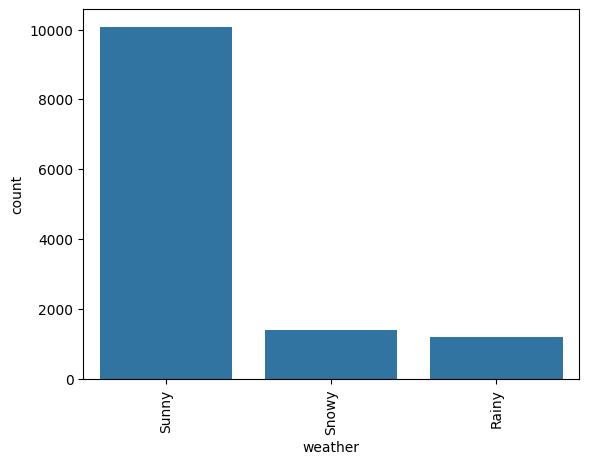


Unique values in 'time':
['2PM' '10AM' '6PM' '7AM' '10PM']
time
10PM    2006
2PM     2009
10AM    2275
7AM     3164
6PM     3230
Name: count, dtype: int64
time
2PM     0.16
10PM    0.16
10AM    0.18
7AM     0.25
6PM     0.25
Name: proportion, dtype: float64


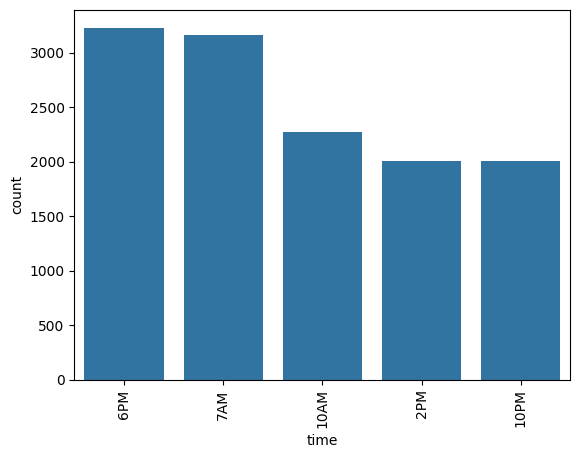


Unique values in 'coupon':
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']
coupon
Restaurant(20-50)        1492
Bar                      2017
Carry out & Take away    2393
Restaurant(<20)          2786
Coffee House             3996
Name: count, dtype: int64
coupon
Restaurant(20-50)        0.12
Bar                      0.16
Carry out & Take away    0.19
Restaurant(<20)          0.22
Coffee House             0.32
Name: proportion, dtype: float64


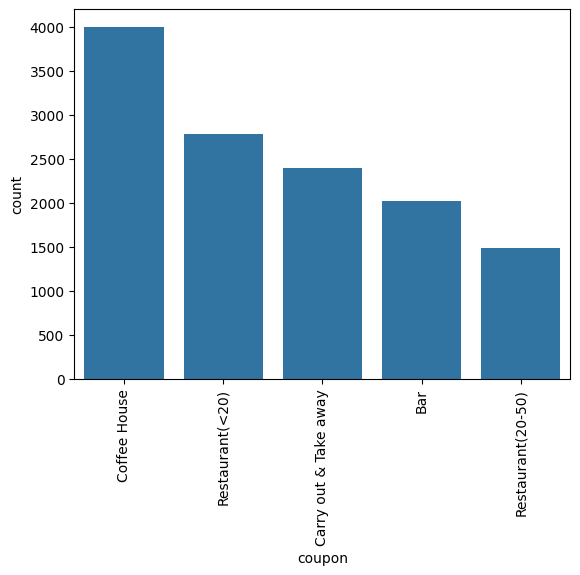


Unique values in 'expiration':
['1d' '2h']
expiration
2h    5593
1d    7091
Name: count, dtype: int64
expiration
2h    0.44
1d    0.56
Name: proportion, dtype: float64


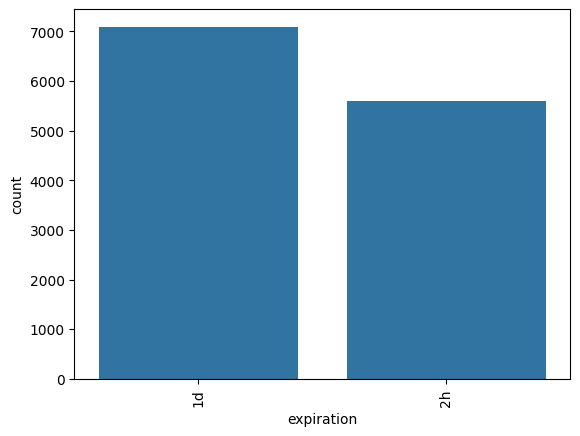


Unique values in 'gender':
['Female' 'Male']
gender
Male      6173
Female    6511
Name: count, dtype: int64
gender
Male      0.49
Female    0.51
Name: proportion, dtype: float64


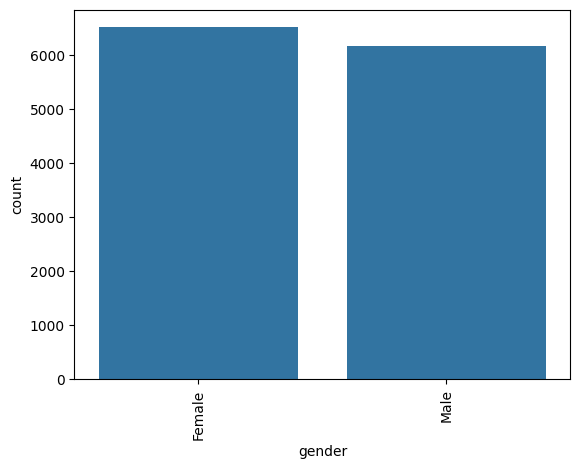


Unique values in 'age':
['21' '46' '26' '31' '41' '50plus' '36' 'below21']
age
below21     547
46          686
41         1093
36         1319
50plus     1788
31         2039
26         2559
21         2653
Name: count, dtype: int64
age
below21    0.04
46         0.05
41         0.09
36         0.10
50plus     0.14
31         0.16
26         0.20
21         0.21
Name: proportion, dtype: float64


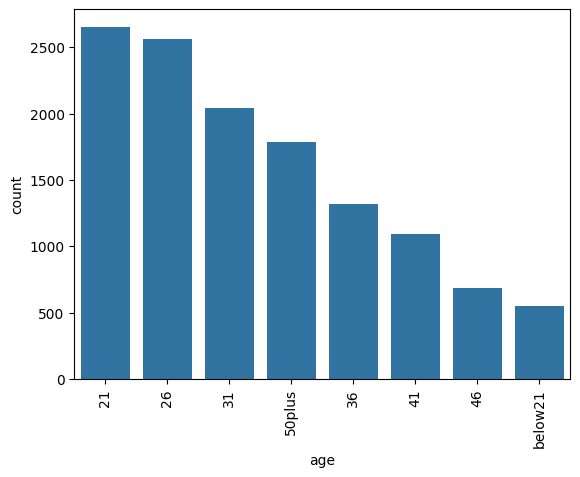


Unique values in 'maritalStatus':
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
maritalStatus
Widowed               130
Divorced              516
Unmarried partner    2186
Single               4752
Married partner      5100
Name: count, dtype: int64
maritalStatus
Widowed              0.01
Divorced             0.04
Unmarried partner    0.17
Single               0.37
Married partner      0.40
Name: proportion, dtype: float64


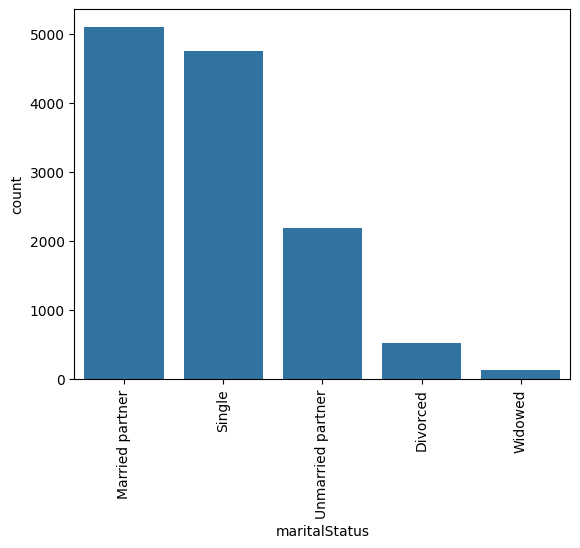


Unique values in 'education':
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']
education
Some High School                            88
High School Graduate                       905
Associates degree                         1153
Graduate degree (Masters or Doctorate)    1852
Bachelors degree                          4335
Some college - no degree                  4351
Name: count, dtype: int64
education
Some High School                          0.01
High School Graduate                      0.07
Associates degree                         0.09
Graduate degree (Masters or Doctorate)    0.15
Some college - no degree                  0.34
Bachelors degree                          0.34
Name: proportion, dtype: float64


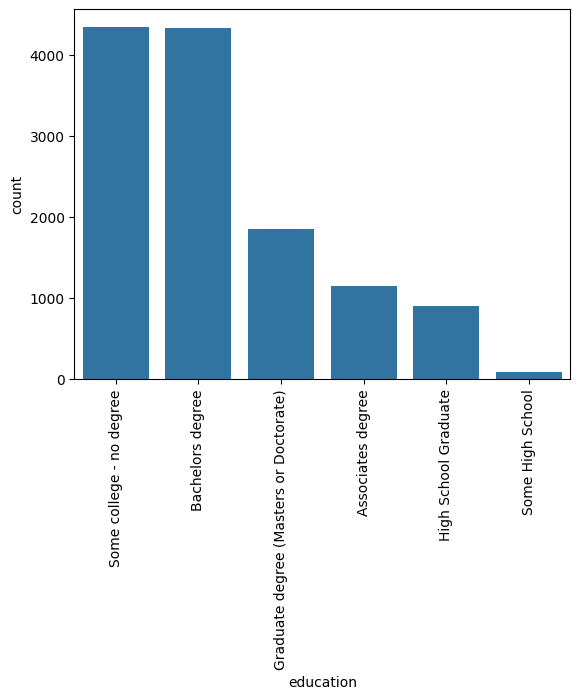


Unique values in 'occupation':
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']
occupation
Farming Fishing & Forestry                     43
Building & Grounds Cleaning & Maintenance      44
Production Occupations                        110
Installation Maintenance & Repair             133
Construction & Extraction                     154
Life Physical Social Science         

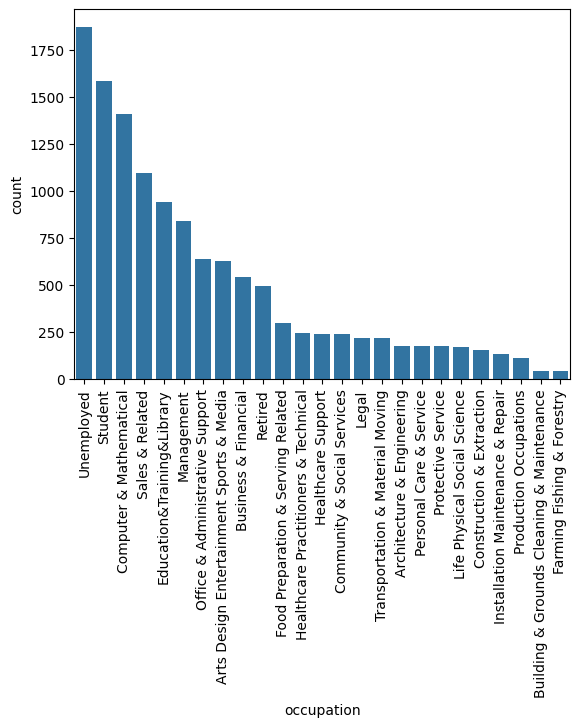


Unique values in 'income':
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']
income
$62500 - $74999      846
$75000 - $87499      857
$87500 - $99999      895
Less than $12500    1042
$50000 - $62499     1659
$100000 or More     1736
$37500 - $49999     1805
$12500 - $24999     1831
$25000 - $37499     2013
Name: count, dtype: int64
income
$87500 - $99999     0.07
$75000 - $87499     0.07
$62500 - $74999     0.07
Less than $12500    0.08
$50000 - $62499     0.13
$37500 - $49999     0.14
$12500 - $24999     0.14
$100000 or More     0.14
$25000 - $37499     0.16
Name: proportion, dtype: float64


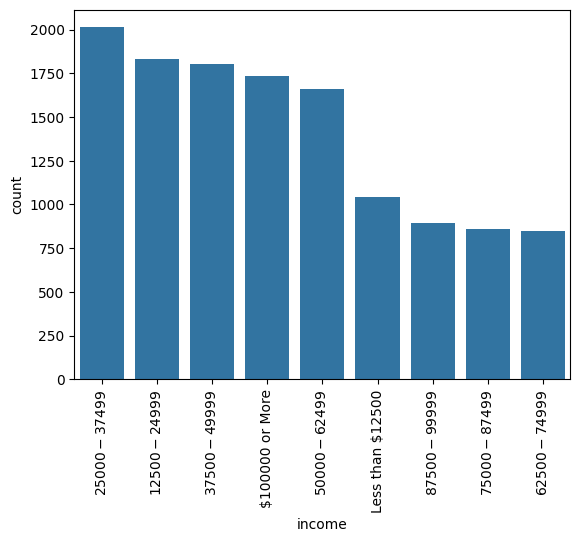


Unique values in 'car':
[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
car
Car that is too old to install Onstar :D       21
crossover                                      21
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
NaN                                         12576
Name: count, dtype: int64
car
Scooter and motorcycle                      0.00
Mazda5                                      0.00
do not drive                                0.00
crossover                                   0.00
Car that is too old to install Onstar :D    0.00
NaN                                         0.99
Name: proportion, dtype: float64


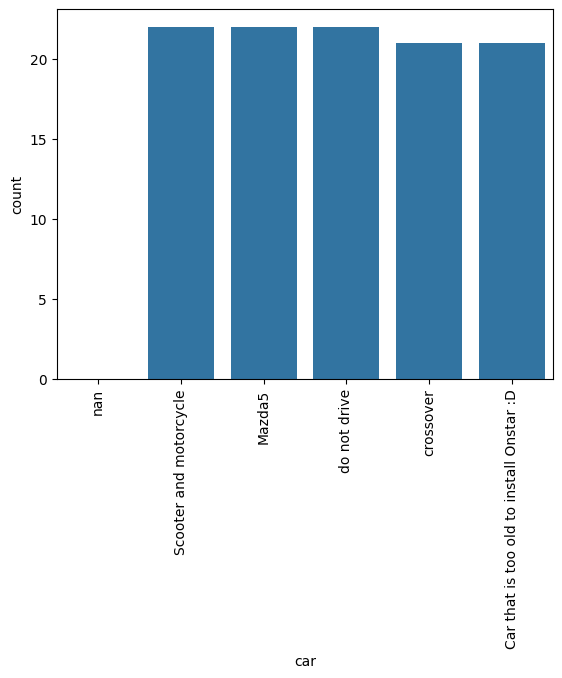


Unique values in 'Bar':
['never' 'less1' '1~3' 'gt8' nan '4~8']
Bar
NaN       107
gt8       349
4~8      1076
1~3      2473
less1    3482
never    5197
Name: count, dtype: int64
Bar
NaN      0.01
gt8      0.03
4~8      0.08
1~3      0.19
less1    0.27
never    0.41
Name: proportion, dtype: float64


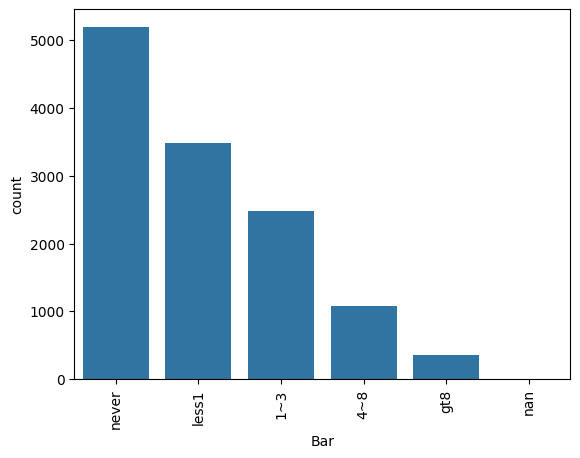


Unique values in 'CoffeeHouse':
['never' 'less1' '4~8' '1~3' 'gt8' nan]
CoffeeHouse
NaN       217
gt8      1111
4~8      1784
never    2962
1~3      3225
less1    3385
Name: count, dtype: int64
CoffeeHouse
NaN      0.02
gt8      0.09
4~8      0.14
never    0.23
1~3      0.25
less1    0.27
Name: proportion, dtype: float64


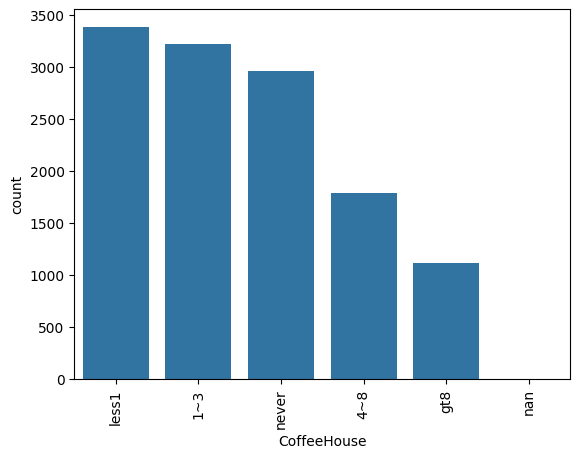


Unique values in 'CarryAway':
[nan '4~8' '1~3' 'gt8' 'less1' 'never']
CarryAway
NaN       151
never     153
gt8      1594
less1    1856
4~8      4258
1~3      4672
Name: count, dtype: int64
CarryAway
NaN      0.01
never    0.01
gt8      0.13
less1    0.15
4~8      0.34
1~3      0.37
Name: proportion, dtype: float64


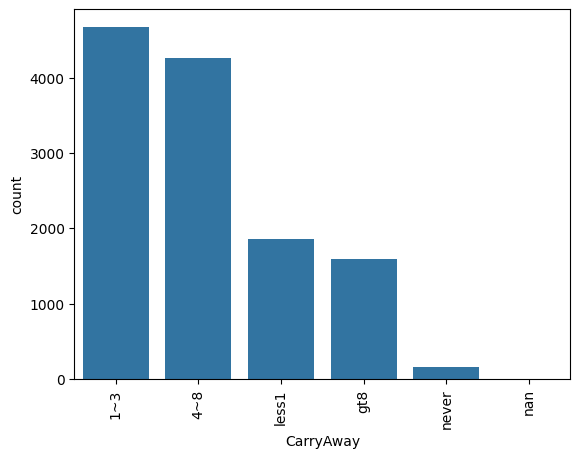


Unique values in 'RestaurantLessThan20':
['4~8' '1~3' 'less1' 'gt8' nan 'never']
RestaurantLessThan20
NaN       130
never     220
gt8      1285
less1    2093
4~8      3580
1~3      5376
Name: count, dtype: int64
RestaurantLessThan20
NaN      0.01
never    0.02
gt8      0.10
less1    0.17
4~8      0.28
1~3      0.42
Name: proportion, dtype: float64


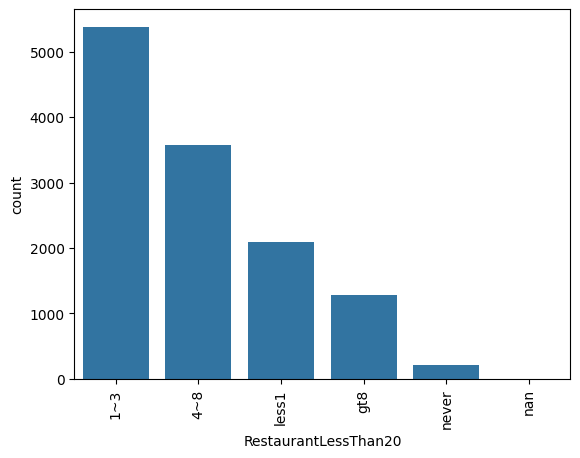


Unique values in 'Restaurant20To50':
['1~3' 'less1' 'never' 'gt8' '4~8' nan]
Restaurant20To50
NaN       189
gt8       264
4~8       728
never    2136
1~3      3290
less1    6077
Name: count, dtype: int64
Restaurant20To50
NaN      0.01
gt8      0.02
4~8      0.06
never    0.17
1~3      0.26
less1    0.48
Name: proportion, dtype: float64


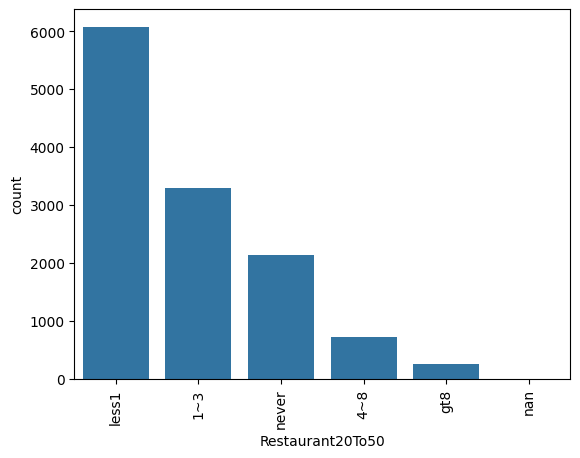

<Figure size 640x480 with 0 Axes>

In [12]:
print(data.info())
# Check for missing values
print(data.isnull().sum())

# Check data types of each column
print(data.dtypes)

# explore data uniqe values
print(data.select_dtypes('object').agg('nunique'))
# Explore categorical columns to identify unique values and help find potential issues and inconsistent representations of the same value
for col in data.select_dtypes(include=['object']):
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())
    print(data[col].value_counts(dropna=False).sort_values())
    print(data[col].value_counts(dropna=False,normalize=True).round(2).sort_values())
    #sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts().values)
    sns.countplot(x=data[col], order=data[col].value_counts(dropna=False).index)
    plt.xticks(rotation=90)  # Rotate labels if needed
    plt.show()
    plt.savefig(f"images/{col}-Unique values_Bar.png", dpi=300, bbox_inches="tight")

temperature
30    2316
55    3840
80    6528
Name: count, dtype: int64
has_children
1    5253
0    7431
Name: count, dtype: int64
toCoupon_GEQ5min
1    12684
Name: count, dtype: int64
toCoupon_GEQ15min
0    5562
1    7122
Name: count, dtype: int64
toCoupon_GEQ25min
1     1511
0    11173
Name: count, dtype: int64
direction_same
1    2724
0    9960
Name: count, dtype: int64
direction_opp
0    2724
1    9960
Name: count, dtype: int64
Y
0    5474
1    7210
Name: count, dtype: int64
(0, 26)
(0, 26)
(0, 26)
(0, 26)
(0, 26)
(0, 26)
(0, 26)
(0, 26)


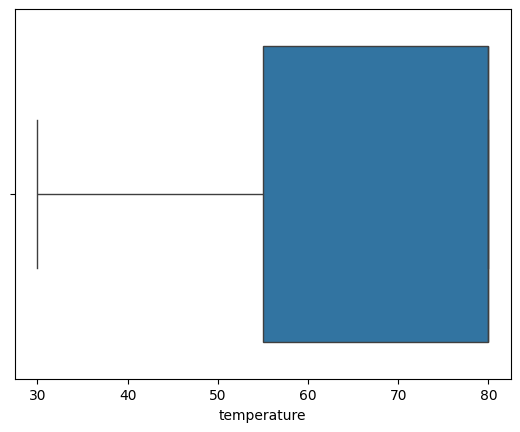

In [13]:
# Identify and handle numerical outliers
for col in data.select_dtypes(include=['number']):
    print(data[col].value_counts(dropna=False).sort_values())


#OR we can do investigation that involves examining specific columns known to have issues based on data description
#check for invalid values or extreme outliers in 'temperature' and we observe the unit is Celsius (°C) t
print(data[data['temperature'] > 100].shape)
sns.boxplot(x=data['temperature'])
plt.savefig("images/temperature_Box.png", dpi=300, bbox_inches="tight")
print(data[(data['has_children'] < 0) | (data['has_children'] > 1)].shape)
print(data[(data['toCoupon_GEQ5min'] < 0) | (data['toCoupon_GEQ5min'] > 1)].shape)
print(data[(data['toCoupon_GEQ15min'] < 0) | (data['toCoupon_GEQ15min'] > 1)].shape)
print(data[(data['toCoupon_GEQ25min'] < 0) | (data['toCoupon_GEQ25min'] > 1)].shape)
print(data[(data['direction_same'] < 0) | (data['direction_same'] > 1)].shape)
print(data[(data['direction_opp'] < 0) | (data['direction_opp'] > 1)].shape)
print(data[(data['Y'] < 0) | (data['Y'] > 1)].shape)


3. Decide what to do about your missing data -- drop, replace, other...

the nan column count is not significat we can remove rows but I see the missing value are these columns/n
car 108,Bar 12577,CoffeeHouse 12467,CarryAway ,RestaurantLessThan20  12554,Restaurant20To50 12495


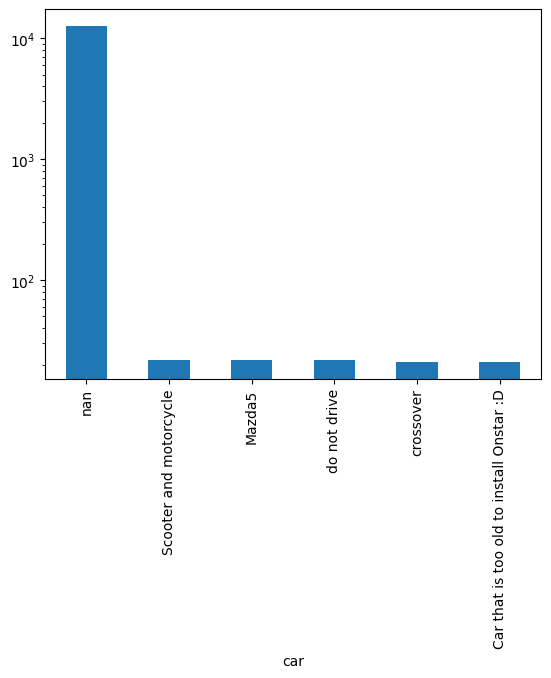

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
Y                           0
dtype: int64


<Figure size 640x480 with 0 Axes>

In [14]:
# Based on the provided code and the data description, a strategy for handling missing data needs to be decided upon.
# The code already checks for missing values using data.isnull().sum().

# Strategy 1: Drop rows with missing values
print("the nan column count is not significat we can remove rows but I see the missing value are these columns/n")
print("car 108,Bar 12577,CoffeeHouse 12467,CarryAway ,RestaurantLessThan20  12554,Restaurant20To50 12495")
# we can use data.dropna() but instead I decided to impute missing data

# Strategy 2: Drop columns
#  1) Car column doesn't seem like relationship with Y and missing most so decided to drop column
plt.yscale("log")
data["car"].value_counts(dropna=False).plot(kind="bar")
plt.show()
plt.savefig("images/Car_Bar_nan.png", dpi=300, bbox_inches="tight")
#data.drop("car", axis=1, inplace=True)

#  2) Colum 'direction_same' is same data as 'direction_opp' we can drop one
data.drop("direction_opp", axis=1, inplace=True)
data.head()

# Strategy 3 :
# replace some items
data["income"] = data["income"].replace("Less than $12500", "$12499 or less")
# Strategy 4 : For categorical features I Impute missing values (replace with a suitable value)
# If dropping rows is not feasible due to significant data loss, imputation is an option.
# The choice of imputation for these columns I think mode is best option
columns_to_fill = ['Bar','CoffeeHouse','CarryAway' ,'RestaurantLessThan20' ,'Restaurant20To50']
for col in columns_to_fill:
  data[col]= data[col].fillna(data[col].mode()[0])  # Fill NaNs with mode
# For numerical features:
# * Mean/Median imputation (for continuous features)
# * Mode imputation (for discrete features)
# there was not any column numerical in this project
# Strategy 4: More advanced techniques
#  K-Nearest Neighbors imputation, or other model-based approaches.
#  I didn't use this stategy

# Note didn't add Below 21 as it is illigal and based on data we don't have any below going to bar so no need to data correction
# Strategy 5: Didn't see any need to use replace for info as it seesm data correct interms of same/looklike data or lowercase upper case
print(data.isnull().sum())


4. What proportion of the total observations chose to accept the coupon?



In [ ]:
# Calculate the proportion of observations that accepted the coupon
accepted_ratio = data['Y'].mean().round(2)
print(f"Proportion of accepted coupons: {accepted_ratio:.2%}")


5. Use a bar plot to visualize the `coupon` column.

<ipython-input-16-a27bc4fc1c67>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data["coupon"].value_counts().index,


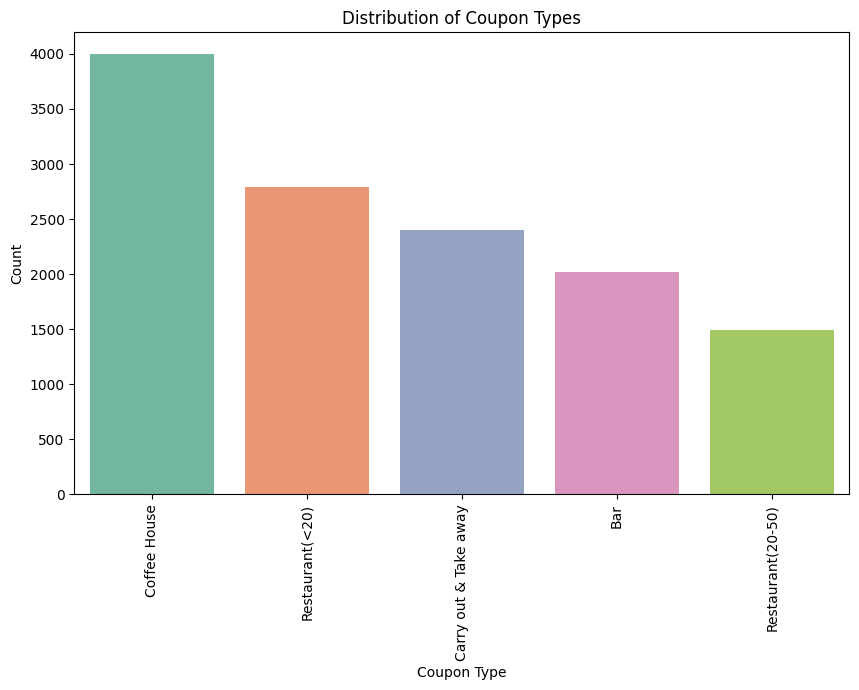

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data["coupon"].value_counts().index,
            y=data["coupon"].value_counts().values,palette="Set2")
plt.xticks(rotation=90)
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()
plt.savefig("images/Distrubution of Coupon Types.png", dpi=300, bbox_inches="tight")

6. Use a histogram to visualize the temperature column.

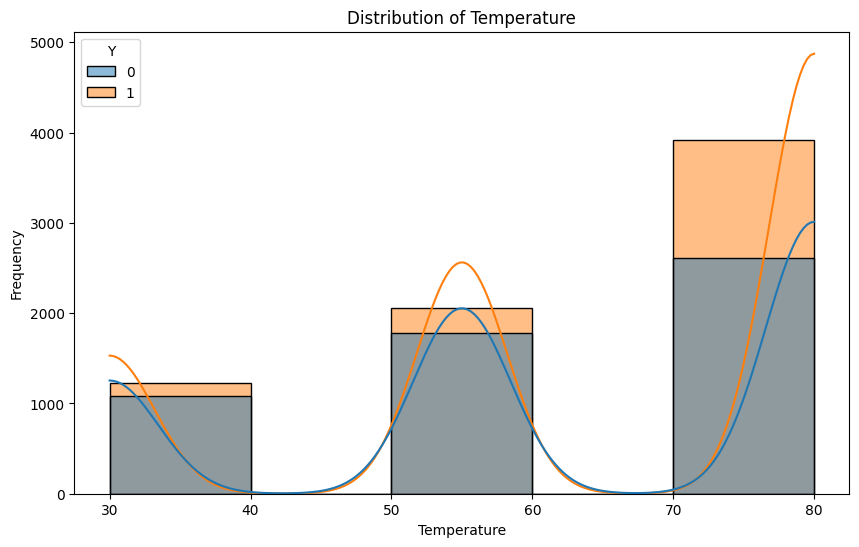

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data,x='temperature', kde=True, hue="Y",bins=5)
plt.savefig("images/Histogram_temperature.png", dpi=300, bbox_inches="tight")
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
bar_coupons = data[data['coupon'] == 'Bar']
print(bar_coupons.head())


        destination  passanger weather  temperature  time coupon expiration  \
9   No Urgent Place     Kid(s)   Sunny           80  10AM    Bar         1d   
13             Home      Alone   Sunny           55   6PM    Bar         1d   
17             Work      Alone   Sunny           55   7AM    Bar         1d   
24  No Urgent Place  Friend(s)   Sunny           80  10AM    Bar         1d   
35             Home      Alone   Sunny           55   6PM    Bar         1d   

    gender age      maritalStatus  ...    Bar CoffeeHouse CarryAway  \
9   Female  21  Unmarried partner  ...  never       never       1~3   
13  Female  21  Unmarried partner  ...  never       never       1~3   
17  Female  21  Unmarried partner  ...  never       never       1~3   
24    Male  21             Single  ...  never       less1       4~8   
35    Male  21             Single  ...  never       less1       4~8   

   RestaurantLessThan20 Restaurant20To50 toCoupon_GEQ5min toCoupon_GEQ15min  \
9                  

2. What proportion of bar coupons were accepted?


In [19]:
bar_acceptance_ratio = bar_coupons['Y'].mean().round(2)
print(f"Proportion of accepted the bar coupons: {bar_acceptance_ratio:.2%}")


Proportion of accepted the bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Bar_group
3_or_less    0.53
4_or_more    0.77
Never        0.19
Name: Y, dtype: float64

Acceptance Rate for those who go to a bar lessEq than 3 times a month: 53.00%

Acceptance Rate for those who go to a bar more than 3 times a month: 77.00%


<ipython-input-20-f9c86f2f4ee8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons.loc[:, "Bar_group"] = bar_coupons["Bar"].apply(


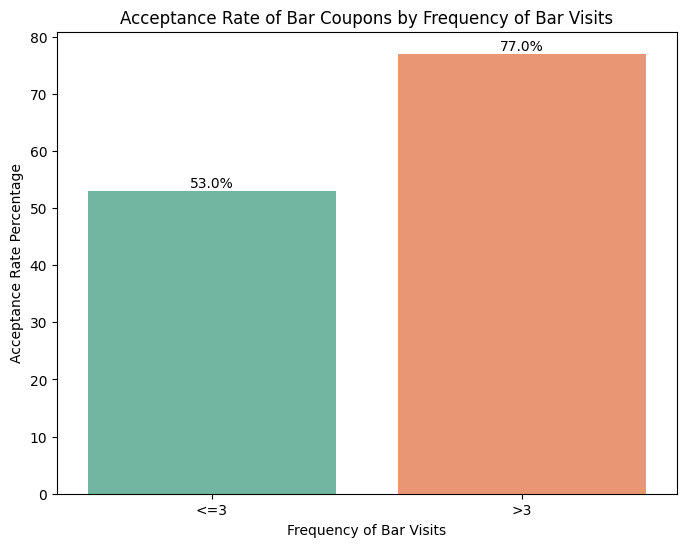

<Figure size 640x480 with 0 Axes>

In [20]:
# Assign a new column Bar_Group "1~3", "less1" for 3and less and "gt8", "4~8" for <3
bar_coupons.loc[:, "Bar_group"] = bar_coupons["Bar"].apply(
    lambda val: "3_or_less" if val in ["1~3", "less1"]
                else "4_or_more" if val in ["gt8", "4~8"]
                else "Never"
)
# Group by Bar_Grouo and ratio for Y
bar_ratio=bar_coupons.groupby('Bar_group')['Y'].mean().round(2)
print(bar_ratio)
print(f"\nAcceptance Rate for those who go to a bar lessEq than 3 times a month: {bar_ratio.iloc[0]:.2%}")
print(f"\nAcceptance Rate for those who go to a bar more than 3 times a month: { bar_ratio.iloc[1]:.2%}")

# visualize the comparison using a bar plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=['<=3', '>3'], y=[bar_ratio.iloc[0]* 100, bar_ratio.iloc[1]* 100],hue =['<=3', '>3'], palette="Set2")
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",  # Format as percentage
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom")  # Center text on bars
plt.ylabel('Acceptance Rate Percentage')
plt.xlabel('Frequency of Bar Visits')
plt.title('Acceptance Rate of Bar Coupons by Frequency of Bar Visits')
plt.show()
plt.savefig("images/Acceptance Rate of Bar Coupons by Frequency of Bar Visitst.png", dpi=300, bbox_inches="tight")

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [21]:
#Strtegy 1
# Define the criteria for the frequent bar-goers group
frequent_bargoers_Over25 = bar_coupons[(bar_coupons['Bar'] .isin(['1~3', '4~8', 'gt8']) & (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus'])))]

# Calculate the acceptance rate for frequent bar-goers
frequent_Over25_acceptance_rate = frequent_bargoers_Over25['Y'].mean()
# Calculate the acceptance rate for all other drivers
other_drivers = bar_coupons[~((bar_coupons['Bar'] .isin(['1~3', '4~8', 'gt8']) & (bar_coupons['age'].isin(['26', '31', '36', '41', '46', '50plus']))))]
other_acceptance_rate = other_drivers['Y'].mean()

# Print the results
print(f"Acceptance Rate for frequent bar-goers (over 25 and >1 bar/month): {frequent_Over25_acceptance_rate:.2%}")
print(f"Acceptance Rate for all other drivers: {other_acceptance_rate:.2%}")

# using T-test a statistical test (e.g., t-test or chi-squared test) to determine if
# there's a significant difference.
from scipy.stats import ttest_ind

t_test, p_value = ttest_ind(frequent_bargoers_Over25['Y'], other_drivers['Y'])

print(f"\nT-statistic: {t_test}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("\nThere is a statistically significant difference in acceptance rates When The customer goes to Bar more than once and over 25 years compare to others.")
else:
    print("\nThere is no statistically significant difference in acceptance rates When The customer goes to Bar more than once and over 25 years compare to others.")


Acceptance Rate for frequent bar-goers (over 25 and >1 bar/month): 69.52%
Acceptance Rate for all other drivers: 33.50%

T-statistic: 13.982435539761426
P-value: 1.8007457118439044e-42

There is a statistically significant difference in acceptance rates When The customer goes to Bar more than once and over 25 years compare to others.


In [22]:
#Strtegy 2 using group by
# Group data by 'Bar' and 'age' and calculate the mean acceptance rate ('Y')
acceptance_rates = bar_coupons.groupby(['Bar', 'age'])['Y'].mean().reset_index()

# Filter for the group of interest: Bar visits > 1/month AND age > 25
frequent_bargoers_over25 = acceptance_rates[
    (acceptance_rates['Bar'].isin(['1~3', '4~8', 'gt8'])) &
    (acceptance_rates['age'].isin(['26', '31', '36', '41', '46', '50plus']))
]

# Calculate the overall acceptance rate for all other drivers
other_drivers_acceptance_rate = acceptance_rates[
    ~((acceptance_rates['Bar'].isin(['1~3', '4~8', 'gt8'])) &
      (acceptance_rates['age'].isin(['26', '31', '36', '41', '46', '50plus'])))
]['Y'].mean()

# Display results
print(f"Acceptance Rate for frequent bar-goers (over 25 and >1 bar/month):{frequent_bargoers_over25['Y'].mean():.2%}")
print(f"Acceptance Rate for all other drivers:{ other_drivers_acceptance_rate:.2%}")
t_test, p_value = ttest_ind(frequent_bargoers_Over25['Y'], other_drivers['Y'])

print(f"\nT-statistic: {t_test}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("\nThere is a statistically significant difference in acceptance rates When The customer goes to Bar more than once and over 25 years compare to others.")
else:
    print("\nThere is no statistically significant difference in acceptance rates When The customer goes to Bar more than once and over 25 years compare to others.")


Acceptance Rate for frequent bar-goers (over 25 and >1 bar/month):70.00%
Acceptance Rate for all other drivers:39.69%

T-statistic: 13.982435539761426
P-value: 1.8007457118439044e-42

There is a statistically significant difference in acceptance rates When The customer goes to Bar more than once and over 25 years compare to others.


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [23]:
#Query data for drivers who go to bars more than once a month and has a passengar who is kid
bar_goers_over_1_with_kids = bar_coupons[bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8'])].query("passanger =='Kid(s)'")

# Filter out drivers with occupations in farming, fishing, or forestry
occupations_to_exclude = ['Farming Fishing & Forestry']
other_occupations_No_FarmFish = bar_goers_over_1_with_kids[~bar_goers_over_1_with_kids['occupation'].isin(occupations_to_exclude)]

# Calculate acceptance rate for the target group which is mean
target_acceptance_rate = other_occupations_No_FarmFish['Y'].mean()

# Calculate acceptance rate for all other drivers (excluding the target group)
other_drivers = bar_coupons[~bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) | bar_coupons['passanger'].isin(['Kid(s)']) | bar_coupons['occupation'].isin(occupations_to_exclude)]
other_acceptance_rate = other_drivers['Y'].mean()
print(f"Acceptance rate for drivers who go to bars more than once a month, no kids, and occupations other than farming/fishing/forestry: {target_acceptance_rate:.2%}")
print(f"Acceptance rate for all other drivers: {other_acceptance_rate:.2%}")


t_test, p_value = ttest_ind(other_occupations_No_FarmFish['Y'], other_drivers['Y'])

print(f"\nT-stat: {t_test}")
print(f"P-value: {p_value}")

alpha = 0.05

if p_value < alpha:
    print("\nThere is a statistically significant difference in acceptance rates When The drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry compare to others.")
else:
    print("\nThere is no statistically significant difference in acceptance rates When The drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry compare to others.")


Acceptance rate for drivers who go to bars more than once a month, no kids, and occupations other than farming/fishing/forestry: 37.78%
Acceptance rate for all other drivers: 29.60%

T-stat: 1.1799954486844044
P-value: 0.23818800761924463

There is no statistically significant difference in acceptance rates When The drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry compare to others.


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [24]:
# Group 1: Bars > 1/month, no kids, not widowed
group1 = bar_coupons[
    bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) &
    ~bar_coupons['passanger'].isin(['Kid(s)']) &
    ~bar_coupons['maritalStatus'].isin(['Widowed'])
]
acceptance_rate_group1 = group1['Y'].mean()

# Group 2: Bars > 1/month, age < 30
group2 = bar_coupons[
    bar_coupons['Bar'].isin(['1~3', '4~8', 'gt8']) &
    bar_coupons['age'].isin(['21', '26']) # Note didn't add Below 21 as it is illigal and based on data we don't have any below going to bar so no need to data correction
]
acceptance_rate_group2 = group2['Y'].mean()

# Group 3: Cheap restaurants > 4/month, income < 50K
group3 = data[
    data['RestaurantLessThan20'].isin(['4~8', 'gt8']) &
    data['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])
]
acceptance_rate_group3 = group3['Y'].mean()

print(f"Acceptance Rate for Group 1: {acceptance_rate_group1 :.2%}")
print(f"Acceptance Rate for Group 2: {acceptance_rate_group2 :.2%}")
print(f"Acceptance Rate for Group 3: {acceptance_rate_group3 :.2%}")


Acceptance Rate for Group 1: 71.32%
Acceptance Rate for Group 2: 73.13%
Acceptance Rate for Group 3: 59.40%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who accept bar coupons more frequently tend to exhibit the following characteristics:

1. **Frequent Bar Visits** – Those who go to bars more than three times a month show higher acceptance rates.

2. **Age Influence** – Drivers aged 25 and older tend to accept bar coupons at a significantly higher rate (21- 25 even more).

3. **Impact of Having Children** – The presence of children as passengers reduces coupon acceptance, likely because parents may not have the flexibility to redeem the offer immediately.

4. **Interacting Factors** – Coupon acceptance is influenced by multiple variables, such as bar-going habits, absence of children, and specific occupations—creating distinct patterns in user behavior.

**Hypothesis**
Regular bar-goers—especially those over 25 years old, without children in the car, and in certain professions—are more likely to accept bar coupons. Further occupation analysis could provide deeper insights into this trend.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [31]:
restaurant20_50_coupons = data[data['coupon'] == 'Restaurant(20-50)']
restaurant20_50_coupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,1,0,0,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,never,1~3,4~8,1~3,1,1,0,0,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,1,0,0,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,never,less1,4~8,4~8,less1,1,1,0,0,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,never,4~8,1~3,1~3,never,1,1,0,0,0


[link text](https://)

Mode income who accepted: $25000 - $37499
Overall acceptance rate for Restaurant20To50 coupons: 44.10%
   age_group           income      mean  count  Frequency %
3      21-50  $25000 - $37499  0.530928    194    53.092784
12    50plus  $25000 - $37499  0.480000     25    48.000000
21   below21  $25000 - $37499  0.125000      8    12.500000


<ipython-input-30-6ff8280a3e15>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurant20_50_coupons.loc[:, "age_group"] = restaurant20_50_coupons["age"].apply(


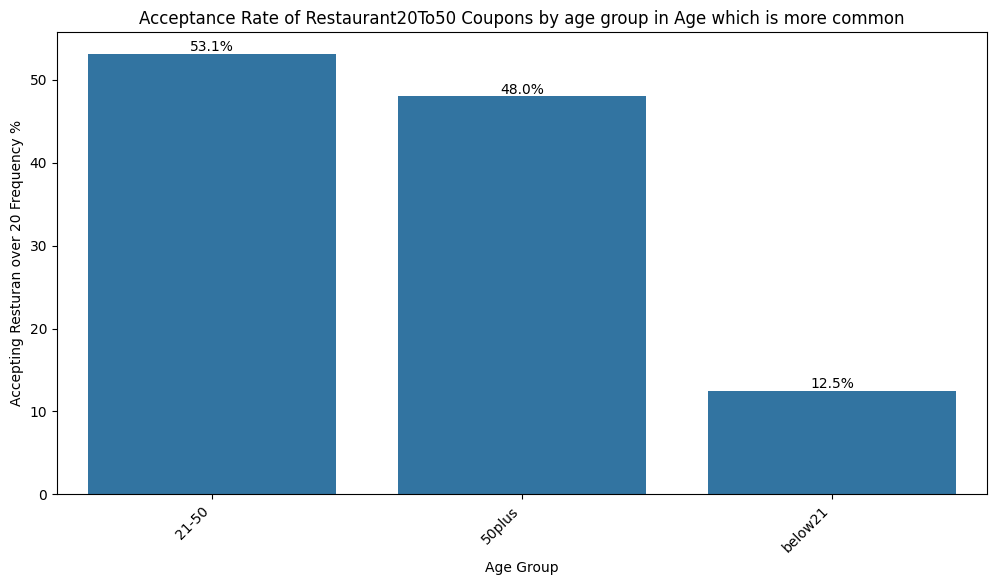

   age_group  time      mean
0      21-50  10AM  0.634409
1      21-50  10PM  0.338710
2      21-50   2PM  0.581560
3      21-50   6PM  0.525157
4      21-50   7AM  0.405797
5     50plus  10AM  0.500000
6     50plus  10PM  0.245283
7     50plus   2PM  0.406250
8     50plus   6PM  0.370370
9     50plus   7AM  0.376812
10   below21  10AM  0.600000
11   below21  10PM  0.388889
12   below21   2PM  0.333333
13   below21   6PM  0.500000
14   below21   7AM  0.333333
   age_group  time      mean  Frequency %
0      21-50  10AM  0.634409    63.440860
1      21-50  10PM  0.338710    33.870968
2      21-50   2PM  0.581560    58.156028
3      21-50   6PM  0.525157    52.515723
4      21-50   7AM  0.405797    40.579710
5     50plus  10AM  0.500000    50.000000
6     50plus  10PM  0.245283    24.528302
7     50plus   2PM  0.406250    40.625000
8     50plus   6PM  0.370370    37.037037
9     50plus   7AM  0.376812    37.681159
10   below21  10AM  0.600000    60.000000
11   below21  10PM  0.388889    

<Figure size 640x480 with 0 Axes>

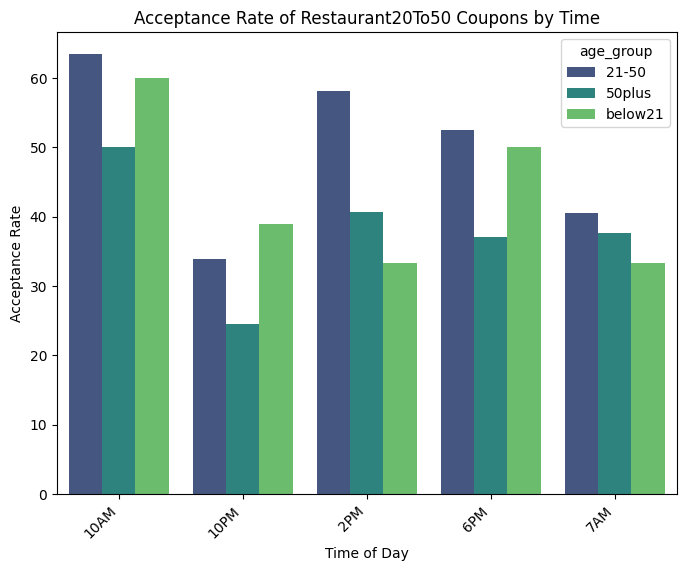

age_group           21-50    50plus   below21
income                                       
$100000 or More  0.472222  0.608696  0.500000
$12499 or less   0.387500  0.200000  0.450000
$12500 - $24999  0.418605  0.137931  0.500000
$25000 - $37499  0.530928  0.480000  0.125000
$37500 - $49999  0.457516  0.333333  0.714286
$50000 - $62499  0.500000  0.512821  0.000000
$62500 - $74999  0.355556  0.500000  0.500000
$75000 - $87499  0.460000  0.333333       NaN
$87500 - $99999  0.435897  0.157895  0.333333


<Figure size 640x480 with 0 Axes>

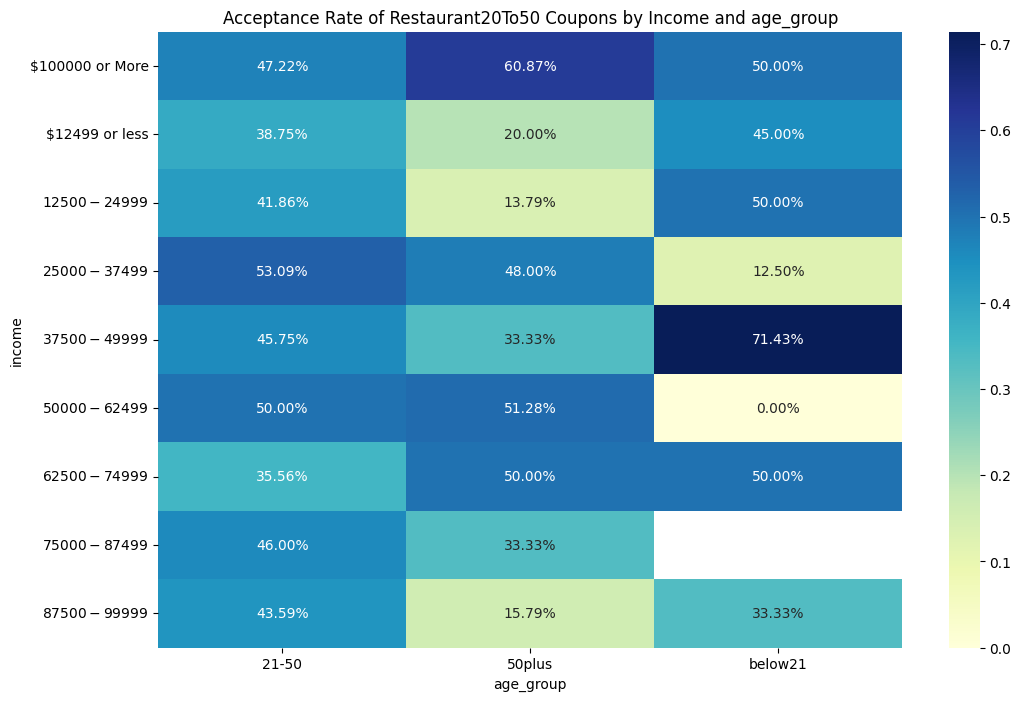

<Figure size 640x480 with 0 Axes>

In [30]:

# Explore Restaurant20To50 coupons
restaurant20_50_coupons = data[data['coupon'] == 'Restaurant(20-50)']

# Find Mode income who accepted
income_mode_accept_coupon = data[data['Y'] == 1].income.mode()[0]
print(f"Mode income who accepted: {income_mode_accept_coupon}")
# create new column for age group
# Assign a new column Bar_Group age
restaurant20_50_coupons.loc[:, "age_group"] = restaurant20_50_coupons["age"].apply(
   lambda val: "below21" if val in ["below21"]
                else "21-50" if val in ["21", "26","31", "36","41", "46"]
                else "50plus"
)

# Acceptance rate for Restaurant20To50 coupons
restaurant20_50_acceptance_rate = restaurant20_50_coupons['Y'].mean()
print(f"Overall acceptance rate for Restaurant20To50 coupons: {restaurant20_50_acceptance_rate:.2%}")

# Acceptance Rate for Income and age_group
# Group by age_group and income calculate acceptance rate
income_acceptance = restaurant20_50_coupons.groupby(['age_group','income']).agg({'Y':['mean','count']}).reset_index()
income_acceptance.columns = ['age_group', 'income', 'mean', 'count']
income_acceptance.head()
# Get data for income column mod  more common
filtered_income_acceptance_mode = income_acceptance.query(f"income == '{income_mode_accept_coupon}'")
filtered_income_acceptance_mode = filtered_income_acceptance_mode.copy() # fixing SettingWithCopyWarning
filtered_income_acceptance_mode['Frequency %'] = filtered_income_acceptance_mode['mean']*100
print(filtered_income_acceptance_mode)

#Display Bar plot for each age group for the most reported income(Mode)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='age_group', y='Frequency %',data =filtered_income_acceptance_mode)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",  # Format as percentage
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom")  # Center text on bars
plt.xticks(rotation=45, ha='right')
plt.title('Acceptance Rate of Restaurant20To50 Coupons by age group in Age which is more common')
plt.xlabel('Age Group')
plt.ylabel('Accepting Resturan over 20 Frequency %')
plt.show()
plt.savefig("images/Restaurant20To50_income.png", dpi=300, bbox_inches="tight")

# Group age and Time and Acceptance Rate Frequency
Group_age_time_acceptance = restaurant20_50_coupons.groupby(['age_group','time']).agg({'Y':['mean']}).reset_index()
Group_age_time_acceptance.columns = ['age_group', 'time', 'mean']
print(Group_age_time_acceptance)
Group_age_time_acceptance = Group_age_time_acceptance.copy() # fixing SettingWithCopyWarning
Group_age_time_acceptance['Frequency %'] = Group_age_time_acceptance['mean']*100
print(Group_age_time_acceptance)
# display bar plot for each time slot per age grop
plt.figure(figsize=(8, 6))
sns.barplot(x='time', y='Frequency %', hue='age_group',  data=Group_age_time_acceptance, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Acceptance Rate of Restaurant20To50 Coupons by Time')
plt.xlabel('Time of Day')
plt.ylabel('Acceptance Rate')
plt.show()
plt.savefig("images/Restaurant20To50_time.png", dpi=300, bbox_inches="tight")

# Combined effect of income and time
# Create a pivot table to examine the combined effect of income and time
income_time_pivot = pd.pivot_table(restaurant20_50_coupons, values='Y', index='income', columns='age_group', aggfunc='mean')
print(income_time_pivot)
plt.figure(figsize=(12, 8))
sns.heatmap(income_time_pivot, annot=True, cmap='YlGnBu', fmt=".2%")
plt.title('Acceptance Rate of Restaurant20To50 Coupons by Income and age_group')
plt.show()
plt.savefig("images/Restaurant20To50_income_time_heatmap.png", dpi=300, bbox_inches="tight")



**Restaurant (20-50) Specific Hypotheses:**

* **Income Level and Acceptance:** Investigated the income levels and extract mode to see which age group whitin the income mode accept restaurant coupons. The analysis shows a notable income level where there's a significant trend in acceptance for certain age groups (21-50).
* **Age and Time Interactions:** Acceptance rates for restaurant coupons also vary based on the time of day and the customer's age. Younger individuals between,21-50 might be more inclined to accept these coupons at specific times (10 AM, 10 pm) compared to older ones.
* **Combined Effect of Income and age group:** The intersection of income level and age group impacts acceptance rates. Certain income groups showing in heap map which 71.34% for age group below 21 and income rate $37500 $49999.


**Further Investigation Hypotheses:**

* **Occupation and Coupon Type:** Investigate whether certain occupations are more likely to accept specific coupon types.
* **Distance to Venue:** Explore if the distance to the venue influences the acceptance rate, especially in relation to the time constraints provided with the coupon.
* **Interactions between variables:** Further examine combinations of multiple factors like 'weather' and 'time' and their combined effect on coupon acceptance rates.  Is there a specific weather pattern at a particular time that influences decisions?
